# dsp4bats - plot spectrograms.

Uses the 'dsp4bats' library to create a dBFS matrix that can be plotted as matplotlib spectrograms.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Add path from jupyter to the dsp4bats library.
import sys
path = ".."
sys.path.append(path)

In [3]:
import pathlib
import numpy as np
import scipy
import dsp4bats

In [4]:
sound_file = 'data_in/Mdau_TE384.wav'
#sound_file = 'data_in/Ppip_TE384.wav'

In [5]:
# Read signal from file. Length 1 sec.
wave_reader = dsp4bats.WaveFileReader(sound_file)
samp_width = wave_reader.samp_width
frame_rate = wave_reader.frame_rate
sampling_freq = wave_reader.sampling_freq
signal = wave_reader.read_buffer()
wave_reader.close()


In [6]:
#window_size = 256
window_size = 512
dbsf_util = dsp4bats.DbfsSpectrumUtil(window_size=window_size, window_function='hann')

In [7]:
jump = int(sampling_freq/1000/32)
size = int(len(signal) / jump)
matrix = dbsf_util.calc_dbfs_matrix(signal, matrix_size=size, jump=jump)
len(matrix)

32000

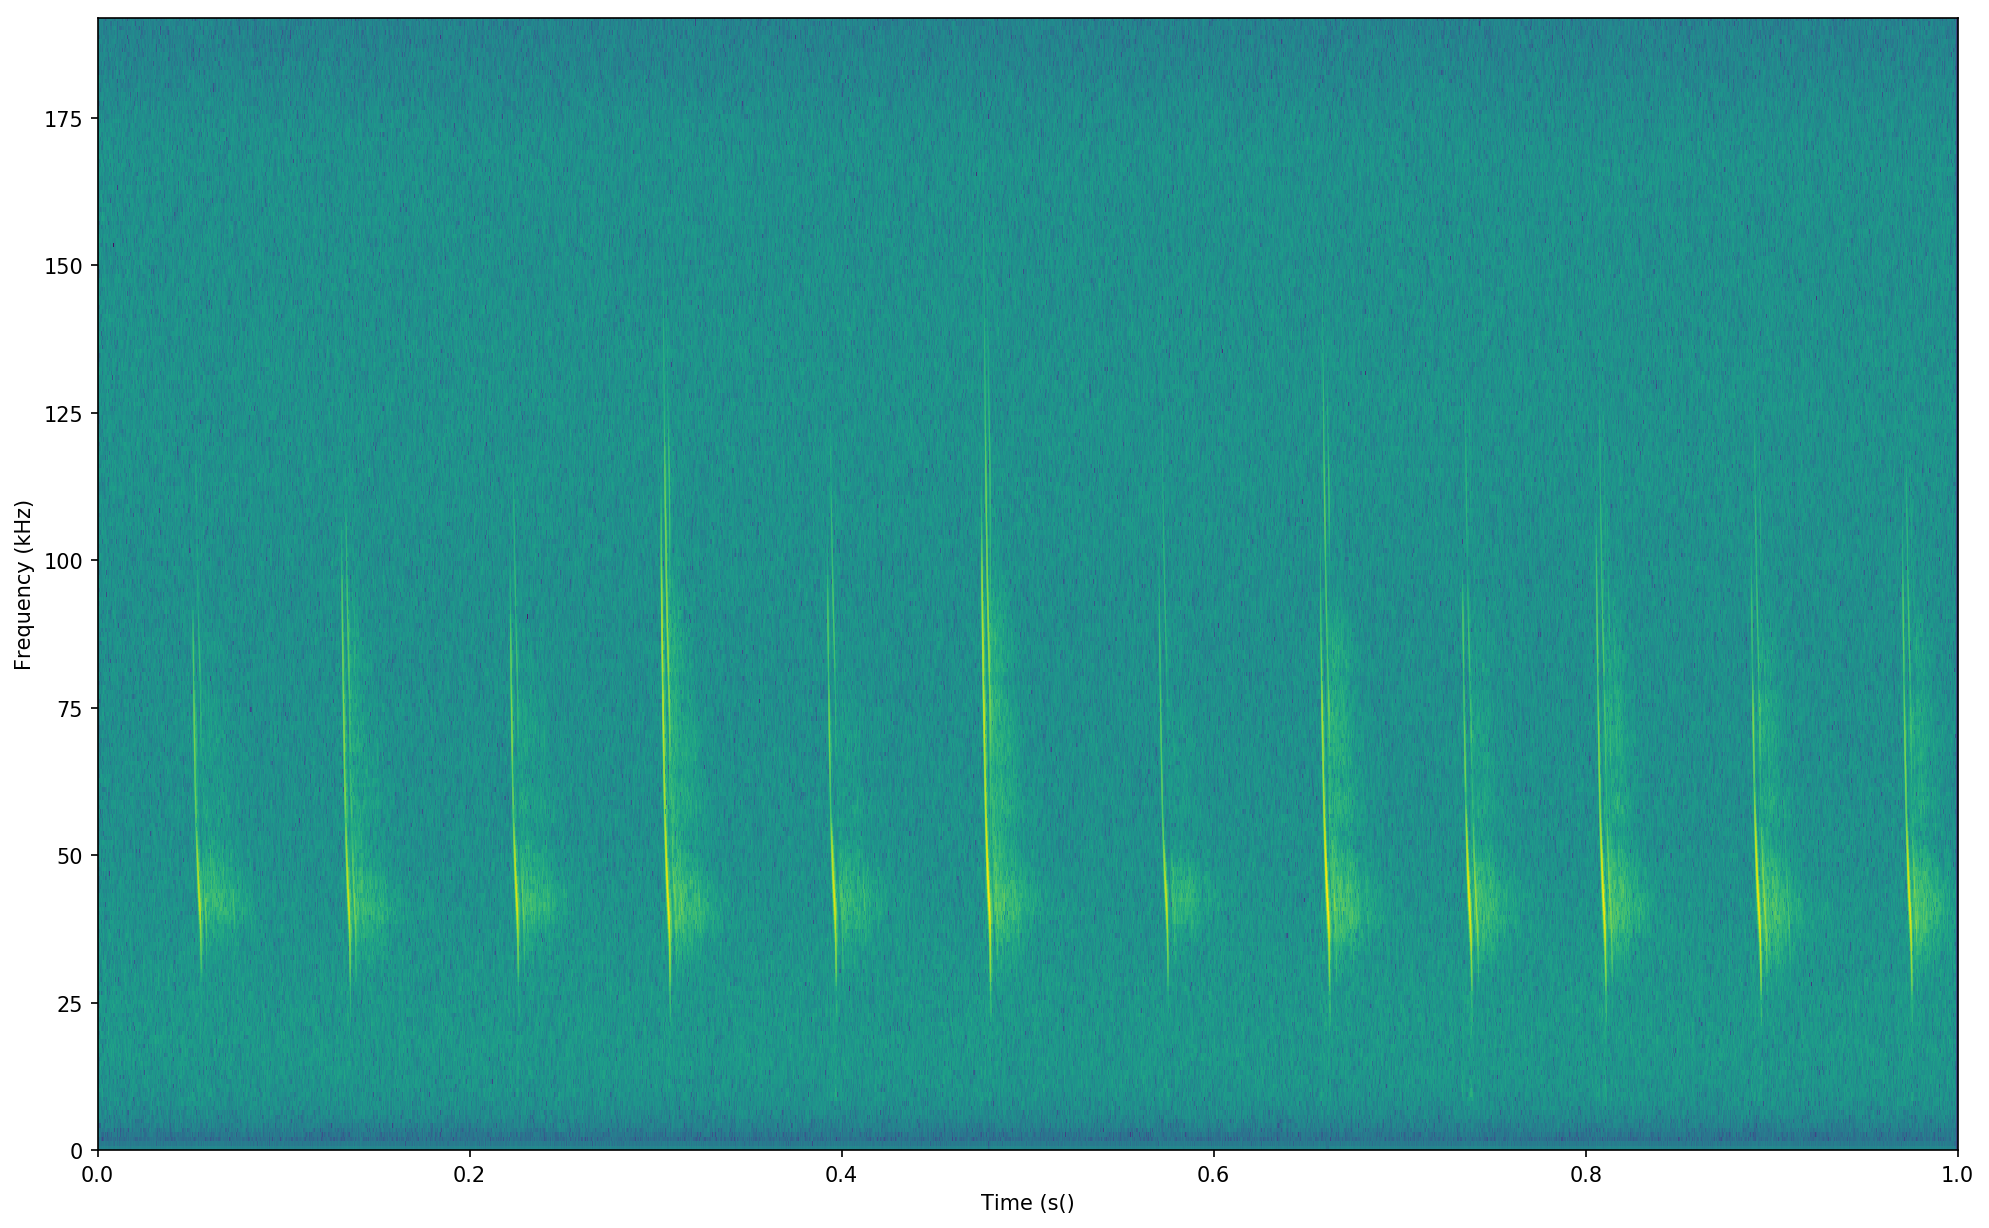

In [8]:
length_in_sec = len(signal) / sampling_freq
max_freq = sampling_freq / 1000 / 2

fig, ax = plt.subplots(figsize=(16, 10), 
                     dpi=150,
                    )
ax.imshow(matrix.T, 
          cmap='viridis', 
          origin='lower',
          extent=(0, length_in_sec, 
                  0, max_freq)
         )
ax.axis('tight')
ax.set_ylabel('Frequency (kHz)')
ax.set_xlabel('Time (s()')
#ax.set_ylim([0,160])

file_name = pathlib.Path(sound_file).stem + '_Spectrogram.png'
fig.savefig('data_out/' + file_name)
plt.show()

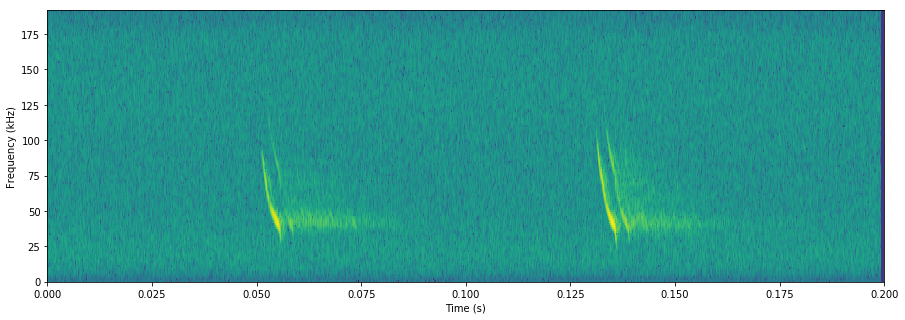

In [9]:
signal_short = signal[0:int(len(signal)/5)]

window_size = 256
dbsf_util = dsp4bats.DbfsSpectrumUtil(window_size=window_size, 
                                      window_function='kaiser')
jump = int(sampling_freq/8000)
size = int(len(signal_short) / jump)
matrix = dbsf_util.calc_dbfs_matrix(signal_short, matrix_size=size, jump=jump)

length_in_sec = len(signal_short) / sampling_freq
max_freq = sampling_freq / 1000 / 2

f, ax = plt.subplots(figsize=(15, 5))
ax.imshow(matrix.T, 
          cmap='viridis', 
          origin='lower',
          extent=(0, length_in_sec, 
                  0, max_freq)
         )
ax.axis('tight')
ax.set_ylabel('Frequency (kHz)')
ax.set_xlabel('Time (s)')
#ax.set_ylim([0,160])

plt.show()

## All in summary. 

Plot first chirp only.

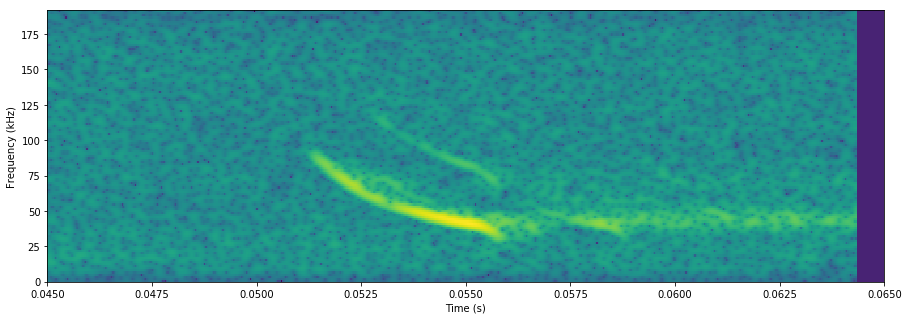

In [10]:
# Settings.
sound_file = 'data_in/Mdau_TE384.wav'
pos_in_sec_from = 0.045
pos_in_sec_to = 0.065
window_size = 256
window_function = 'kaiser'
jumps_per_ms = 32

# Read signal from file. Length 1 sec.
wave_reader = dsp4bats.WaveFileReader(sound_file)
samp_width = wave_reader.samp_width
frame_rate = wave_reader.frame_rate
sampling_freq = wave_reader.sampling_freq
signal = wave_reader.read_buffer()
wave_reader.close()
#
# Cut part from 1 sec signal.
signal_short = signal[int(pos_in_sec_from * sampling_freq):int(pos_in_sec_to * sampling_freq)]

# Create util.
dbsf_util = dsp4bats.DbfsSpectrumUtil(window_size=window_size, 
                                       window_function=window_function)
# Create matrix.
jump = int(sampling_freq/1000/jumps_per_ms)
size = int(len(signal_short) / jump)
matrix = dbsf_util.calc_dbfs_matrix(signal_short, matrix_size=size, jump=jump)

# Plot.
max_freq = sampling_freq / 1000 / 2 # kHz and Nyquist.
f, ax = plt.subplots(figsize=(15, 5))
ax.imshow(matrix.T, 
          cmap='viridis', 
          origin='lower',
          extent=(pos_in_sec_from, pos_in_sec_to, 
                  0, max_freq)
         )
ax.axis('tight')
ax.set_ylabel('Frequency (kHz)')
ax.set_xlabel('Time (s)')
#ax.set_ylim([0,160])
#
plt.show()